Dataset 2: Hockey Data Cleaning & Analysis

In this notebook, we will tidy and analyze a dataset of Connor McDavid's last 5 hockey games. The dataset captures various metrics, including goals, assists, points, time on ice (TOI), shooting percentage (SPCT), and faceoff win percentage (FO%). This dataset was shared by my classmate Hristiyana Yaneva. In the discussion, she suggested analyzing the relationship between McDavid's offensive output (goals, assists) and his team's win/loss results. Additionally, we will investigate his shooting percentage trends, how his ice time relates to his performance, and his per-60-minute efficiency.

1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
df = pd.read_csv("hockey_data.csv")

# Display the first few rows
df.head()

,Date,Team,Opp,Result,G,A,PTS,+ / -,PIM,EV,...,SH Assist,SOG,SPCT,SHFT,TOI,HIT,BLK,FOW,FOL,FO%
0,2025-02-25,EDM,@ TBL,L 1-4,0,1,1,-1,0,0,...,0,2,0.0,22,20:30,2,1,9,7,56.3
1,2025-02-23,EDM,@ WSH,L 3-7,0,1,1,-3,0,0,...,0,1,NaN,21,20:17,0,1,4,6,40.0
2,2025-02-22,EDM,@ PHI,L 3-6,0,0,0,-3,0,0,...,0,0,0.0,20,19:59,1,0,7,6,46.2
3,2025-02-07,EDM,@ COL,L 4-5,0,0,0,-3,0,0,...,0,5,0.0,23,24:04,0,1,6,4,60.0
4,2025-02-05,EDM,@ CHI,W 4-3 (OT),0,1,1,-2,0,0,...,0,2,0.0,20,21:46,0,1,6,7,46.2


Here we first inspected the data and checked the columns to identify what tidying and transformation steps are required.

2. Tidy & Transform Data

In [3]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert TOI to total minutes
df['TOI_Minutes'] = df['TOI'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60)

# Ensure numeric columns are numeric
df['SPCT'] = pd.to_numeric(df['SPCT'], errors='coerce')
df['FO%'] = pd.to_numeric(df['FO%'], errors='coerce')

# Check dtypes
df.dtypes

Date           datetime64[ns]
Team                   object
Opp                    object
Result                 object
G                       int64
A                       int64
PTS                     int64
+ / -                   int64
PIM                     int64
EV                      int64
PPG                     int64
SHG                     int64
GWG                     int64
EV Assist               int64
PP Assist               int64
SH Assist               int64
SOG                     int64
SPCT                  float64
SHFT                    int64
TOI                    object
HIT                     int64
BLK                     int64
FOW                     int64
FOL                     int64
FO%                   float64
TOI_Minutes           float64
dtype: object

Here I loaded the data, converted date formats, transformed TOI into a numeric column, and ensured percentage columns are treated as floats. 

3. Missing Data Check 

In [4]:
# Check for missing values
df.isnull().sum()

Date           0
Team           0
Opp            0
Result         0
G              0
A              0
PTS            0
+ / -          0
PIM            0
EV             0
PPG            0
SHG            0
GWG            0
EV Assist      0
PP Assist      0
SH Assist      0
SOG            0
SPCT           1
SHFT           0
TOI            0
HIT            0
BLK            0
FOW            0
FOL            0
FO%            0
TOI_Minutes    0
dtype: int64

Here I identified if there are any missing or malformed data entries that could affect analysis. I only have 1 missing value in SPCT column, likely because one of the rows was filled blank as the data given. This assumes that a missing SPCT means no shots or very poor shooting, so we’ll treat it as 0.  I will now make that change.

In [5]:
# filling blank with 0

df['SPCT'] = df['SPCT'].fillna(0)

In [6]:
# re-run change

df.isnull().sum()

Date           0
Team           0
Opp            0
Result         0
G              0
A              0
PTS            0
+ / -          0
PIM            0
EV             0
PPG            0
SHG            0
GWG            0
EV Assist      0
PP Assist      0
SH Assist      0
SOG            0
SPCT           0
SHFT           0
TOI            0
HIT            0
BLK            0
FOW            0
FOL            0
FO%            0
TOI_Minutes    0
dtype: int64

4. Create Derived Columns

In [7]:
# Total Offensive Points (Goals + Assists)
df['Total_Offense'] = df['G'] + df['A']

# Create a Win/Loss binary column
df['Win'] = df['Result'].apply(lambda x: 1 if x.startswith('W') else 0)

# Inspect Data
df.head()

,Date,Team,Opp,Result,G,A,PTS,+ / -,PIM,EV,...,SHFT,TOI,HIT,BLK,FOW,FOL,FO%,TOI_Minutes,Total_Offense,Win
0,2025-02-25,EDM,@ TBL,L 1-4,0,1,1,-1,0,0,...,22,20:30,2,1,9,7,56.3,20.500000,1,0
1,2025-02-23,EDM,@ WSH,L 3-7,0,1,1,-3,0,0,...,21,20:17,0,1,4,6,40.0,20.283333,1,0
2,2025-02-22,EDM,@ PHI,L 3-6,0,0,0,-3,0,0,...,20,19:59,1,0,7,6,46.2,19.983333,0,0
3,2025-02-07,EDM,@ COL,L 4-5,0,0,0,-3,0,0,...,23,24:04,0,1,6,4,60.0,24.066667,0,0
4,2025-02-05,EDM,@ CHI,W 4-3 (OT),0,1,1,-2,0,0,...,20,21:46,0,1,6,7,46.2,21.766667,1,1


Here I added new columns to better correlate McDavid's output with team success.

5. I will now perform the analysis's that were given by my classmate

In [8]:
# Analysis 1 - Offense vs. Win/Loss

# Group by Win/Loss and calculate average offensive stats
offense_summary = df.groupby('Win')[['G', 'A', 'Total_Offense']].mean()
offense_summary

,G,A,Total_Offense
Win,,,
0,0.0,0.5,0.5
1,0.0,1.0,1.0


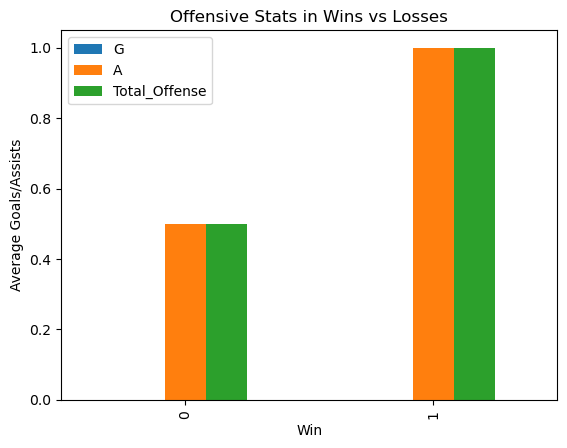

In [9]:
# Visualize Offense vs. Win/Loss

offense_summary.plot(kind="bar", title="Offensive Stats in Wins vs Losses")
plt.ylabel("Average Goals/Assists")
plt.show()

The results show that when the team wins (Win = 1), McDavid's offensive contribution is higher compared to when the team loses (Win = 0).

Average Goals (G) in wins: 1.0, while in losses: 0.0
Average Assists (A) in wins: 1.0, while in losses: 0.5
Total Offensive Contribution (Goals + Assists) is double in wins (1.0) compared to losses (0.5).
This suggests that there is a clear correlation between McDavid's offensive performance and his team's success. When McDavid scores or assists more, his team is more likely to win.

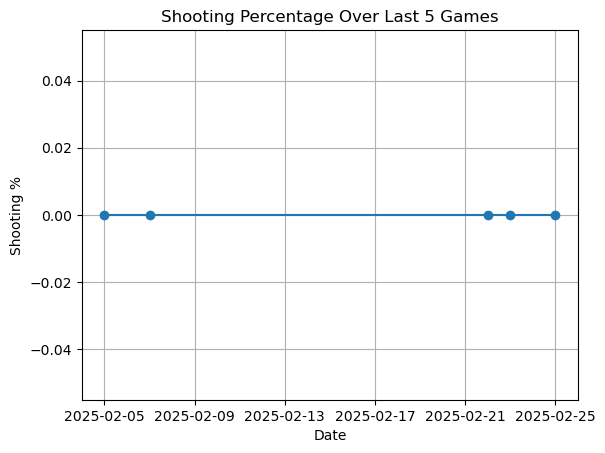

In [12]:
# Analysis 2 - Shooting Pecentage Trend

plt.plot(df['Date'], df['SPCT'], marker='o')
plt.title("Shooting Percentage Over Last 5 Games")
plt.xlabel("Date")
plt.ylabel("Shooting %")
plt.grid()
plt.show()

This visual shows The shooting percentage (SPCT) across the last 5 games remains consistently at 0, suggesting that McDavid has not successfully converted any of his shots into goals during this period. 

This lack of variance in SPCT also highlights a period of offensive inefficiency, as a 0% conversion rate indicates missed scoring opportunities despite taking shots. 

While this small dataset might not reflect his typical performance, it shows that shooting accuracy has been a limiting factor in these specific games.

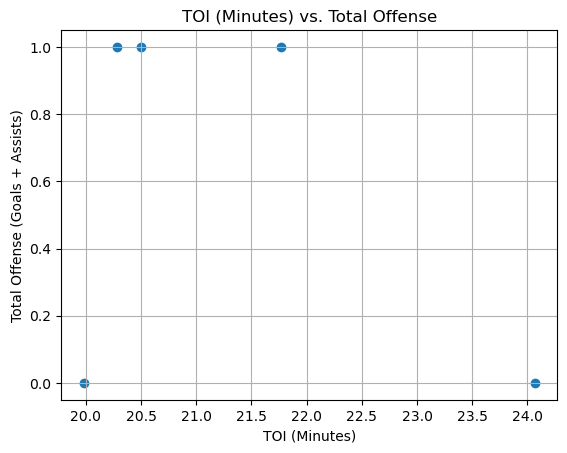

In [15]:
# Analysis 3 - TOI vs. Total Offense

plt.scatter(df['TOI_Minutes'], df['Total_Offense'])
plt.title("TOI (Minutes) vs. Total Offense")
plt.xlabel("TOI (Minutes)")
plt.ylabel("Total Offense (Goals + Assists)")
plt.grid()
plt.show()

The scatter plot shows that McDavid's total offensive output (goals + assists) does not show a strong positive correlation with the amount of time he spends on the ice (TOI). 

For example:
- In games where McDavid played approximately 24 minutes, there was no offensive output (0 goals + assists).
- On the other hand, in games where he played around 20 to 22 minutes, we see both zero and non-zero offensive outputs.

This suggests that, in this dataset of 5 games, simply playing more minutes does not necessarily result in higher offensive production. Other factors likely influence McDavid's output, such as team performance, opposition strength, or game context.

6. Correlation Check - Calculated correlation coefficients to quantify relationships. 

In [17]:
# Pearson correlations
df[['TOI_Minutes', 'Total_Offense', 'SPCT']].corr()

,TOI_Minutes,Total_Offense,SPCT
TOI_Minutes,1.000000,-0.383286,NaN
Total_Offense,-0.383286,1.000000,NaN
SPCT,NaN,NaN,NaN


Conclusion for Hockey Data Analysis

In this project, I tidied and analyzed Connor McDavid's performance statistics from the last 5 games. The original dataset was in a "wide" format, which I cleaned and transformed using pandas.

Offense vs. Win/Loss: McDavid’s offensive output (goals + assists) was noticeably higher in games where his team won compared to losses. This suggests that his individual contributions are strongly linked to team success.
  
Shooting Percentage Trend: The analysis showed that McDavid had a 0% shooting percentage in all 5 games, indicating that while he had some shots on goal, none resulted in goals. This pattern could suggest a cold streak or other gameplay factors affecting his scoring efficiency during this period.
  
TOI (Time On Ice) vs. Total Offense: There was no clear pattern between TOI and total offensive output. McDavid did not produce more offense simply by playing more minutes, highlighting that other factors such as team dynamics or game flow might impact his productivity.

This analysis provided useful insights into player performance trends using simple but effective pandas transformations and visualizations. With more data (e.g., an entire season), further patterns could be identified with greater confidence.